In [2]:

import json
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


Testando diferentes números de clusters...


Calculando inércia: 100%|██████████| 18/18 [00:05<00:00,  3.45it/s]


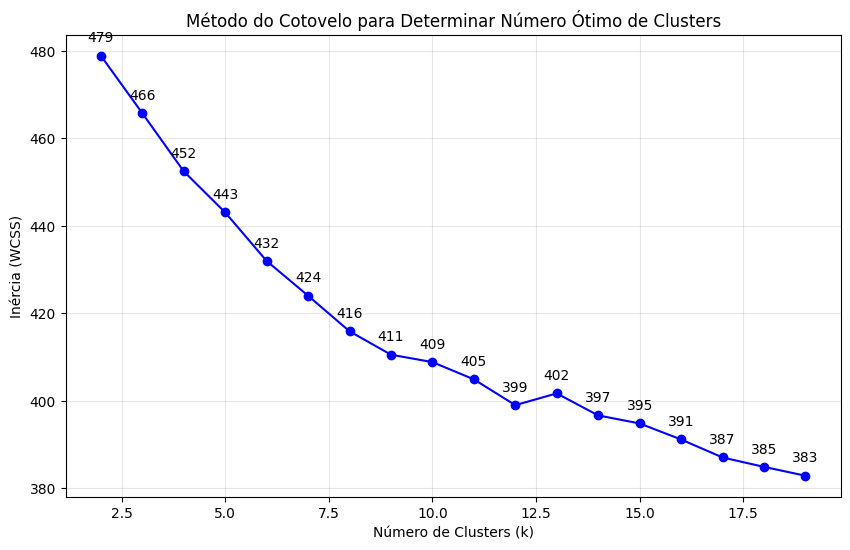

In [3]:
import numpy as np

input_path = '../data/embeddings/reddit_embeddings.json'

with open(input_path, 'r', encoding='utf-8') as f:
    embeddings = json.load(f)

# Range de clusters para testar
k_range = range(2, 20)
inertias = []

print("Testando diferentes números de clusters...")

for k in tqdm(k_range, desc="Calculando inércia"):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(embeddings)
    inertias.append(kmeans_test.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS)')
plt.title('Método do Cotovelo para Determinar Número Ótimo de Clusters')
plt.grid(True, alpha=0.3)

# Adicionar valores no gráfico
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    plt.annotate(f'{inertia:.0f}', (k, inertia), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [4]:
# Defina o número de clusters (pode ajustar)
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

print(f'Clusters criados: {n_clusters}')

Clusters criados: 7


In [5]:
input_path = '../data/comments/comments_with_problems.json'

with open(input_path, 'r', encoding='utf-8') as f:
    comments = json.load(f)

In [12]:

clusters_dict = defaultdict(list)

for label, comment in tqdm(zip(labels, comments), total=len(comments), desc='Organizando clusters'):
    clusters_dict[int(label)].append(comment)

# Converter defaultdict para dict normal
clusters_dict = dict(clusters_dict)


Organizando clusters: 100%|██████████| 588/588 [00:00<00:00, 589025.73it/s]


In [13]:
clusters_dict

{2: ['Trades, almost Every one is aging out quicker than they are being replaced',
  'The car business on the sales side. Once this clown generation of 55+ are out of the industry the experience of buying a car will become much easier, simpler, and transparent.',
  'Advertising. Too many executives are still shouting about bringing back ‘big magical ideas’ and long-form TV ads',
  "Higher Education!\nNot the academics but the administrative and management. They're pretty old, very rigid, and dissociated from reality and trends.",
  'Real estate , we need more innovation',
  'Car wash equipment repair and installation. It’s already thin but now people are aging out. Some of the fixes are learned by experience. Hard to teach it; it’s a learn as you go industry. Some is teachable but not all.',
  'Local professional services. Accountants, lawyers, consultants stuck in 1990s workflows. Anyone who can build simple client portals and automated scheduling will steal their clients.',
  'Iron a

In [14]:
# Salvar os clusters em formato JSON
output_path = '../data/clusters/reddit_clusters.json'

# Salvar o arquivo JSON
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(clusters_dict, f, ensure_ascii=False, indent=2)


### Redução de dimensionalidade

In [6]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

print(f'Embedding reduzido: {embedding_2d.shape}')
print(f'Variância explicada: {reducer.explained_variance_ratio_}')
print(f'Variância total explicada: {sum(reducer.explained_variance_ratio_):.4f}')


Embedding reduzido: (588, 2)
Variância explicada: [0.04653801 0.03934276]
Variância total explicada: 0.0859


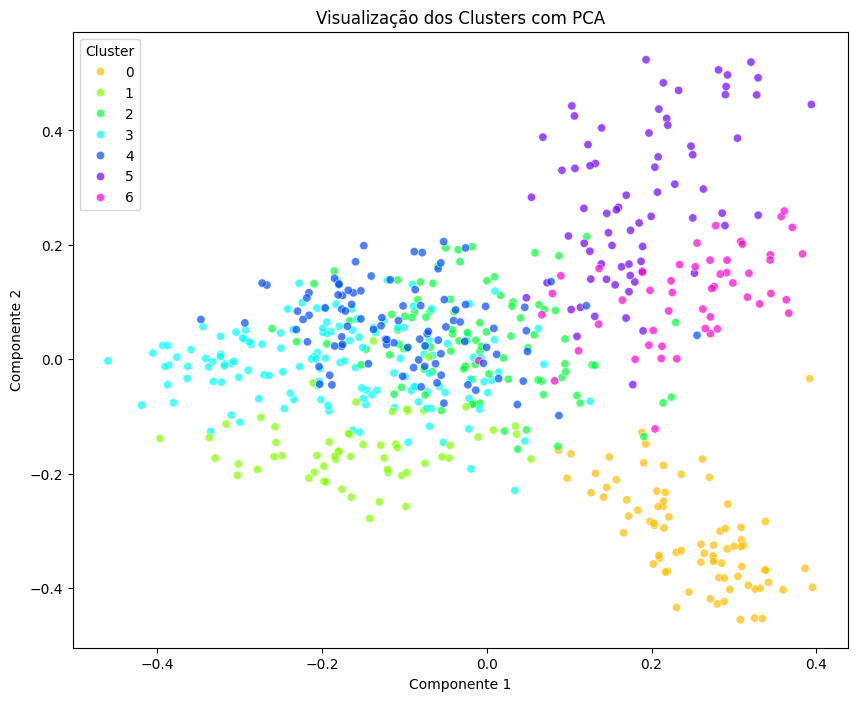

In [7]:

plt.figure(figsize=(10, 8))
palette = sns.color_palette('hsv', n_colors=n_clusters)

sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=labels,
    palette=palette,
    legend='full',
    alpha=0.7
)

plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')
plt.show()
